<a href="https://colab.research.google.com/github/aryanwalia2003/email_classifier/blob/main/sms_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install matplotlib_inline

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

In [18]:
# spam=pd.read_csv("spam.csv")
spam=pd.read_csv('spam.csv', encoding='latin-1')
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [19]:
spam.shape

(5572, 5)

In [20]:
spam.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [21]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [22]:
spam.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [23]:
spam.drop(columns={'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'},inplace=True)

In [24]:
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
spam.isna().sum()

v1    0
v2    0
dtype: int64

In [26]:
spam.rename(columns={"v1":"Class","v2":"Text"},inplace=True)

In [27]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
spam.Class=encoder.fit_transform(spam.Class)#ham=0

In [28]:
spam.head()

,Class,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
spam.duplicated().sum()

403

In [30]:
spam.drop_duplicates(keep="first",inplace=True)

In [31]:
spam.shape

(5169, 2)

EDA

In [32]:
spam.Class.value_counts() ##there are much more spam messages as compared to ham messages

0    4516
1     653
Name: Class, dtype: int64

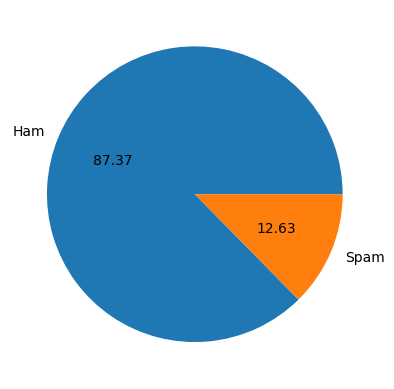

In [33]:
plt.pie(spam.Class.value_counts(),labels=["Ham","Spam"],autopct="%0.2f")
plt.show() ## ham is 87.37% of total dataset

In [34]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [35]:
spam["num_characters"]=spam.Text.apply(len)
spam

,Class,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [36]:
spam["num_words"]=spam.Text.apply(lambda x:len(nltk.word_tokenize(x)))
spam.head()

,Class,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [37]:
spam["num_sent"]=spam.Text.apply(lambda x:len(nltk.sent_tokenize(x)))
spam.head()

,Class,Text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [38]:
spam[["num_characters","num_words","num_sent"]].describe()

,num_characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
spam[spam.Class==0][["num_characters","num_words","num_sent"]].describe() ##ham

,num_characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [40]:
spam[spam.Class==1][["num_characters","num_words","num_sent"]].describe() ##spam -- spam has lesser no of words as compared to ham

,num_characters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


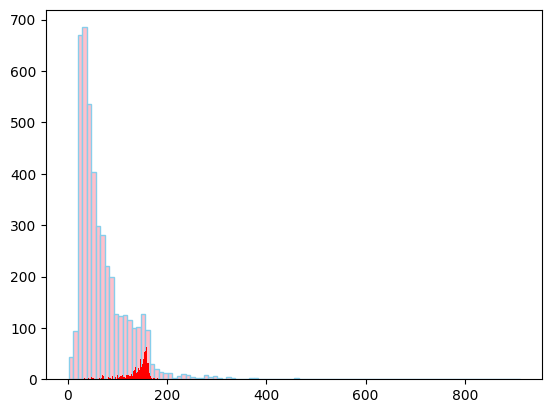

In [41]:
plt.hist(spam[spam.Class==0]["num_characters"],color="#FFC0CB",bins=100,ec="skyblue")
plt.hist(spam[spam.Class==1]["num_characters"],color="#FF0000",bins=100)
plt.show()

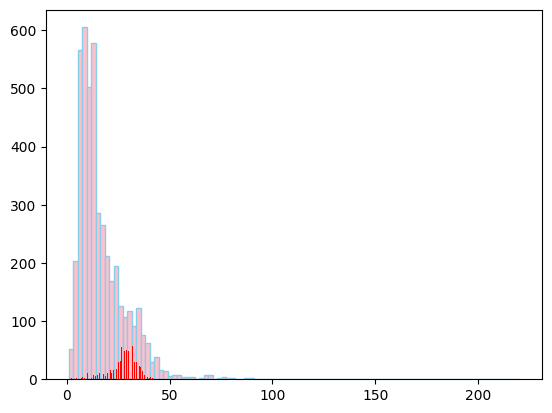

In [42]:
plt.hist(spam[spam.Class==0]["num_words"],color="#FFC0CB",bins=100,ec="skyblue")
plt.hist(spam[spam.Class==1]["num_words"],color="#FF0000",bins=100)
plt.show()

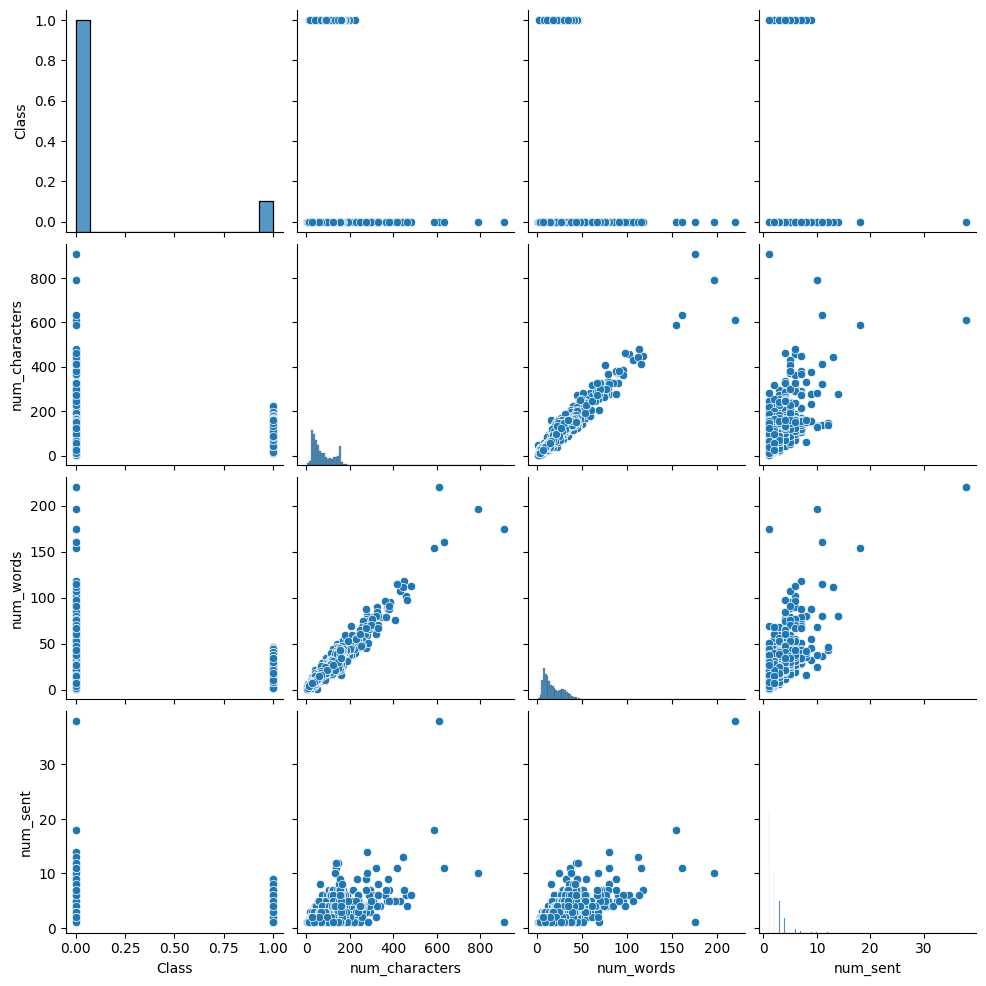

In [43]:
sns.pairplot(spam)

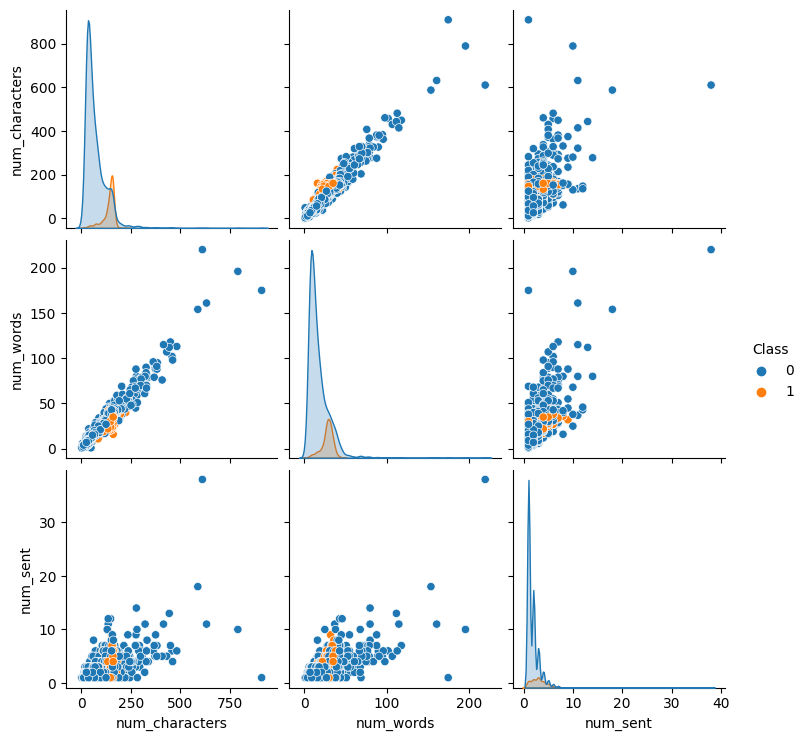

In [44]:
sns.pairplot(spam,hue="Class")

In [45]:
spam.corr()

<ipython-input-45-78a29e326797>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spam.corr()


,Class,num_characters,num_words,num_sent
Class,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sent,0.263939,0.624139,0.679971,1.000000


<ipython-input-46-084b3e124a73>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(spam.corr(),annot=True,cmap="coolwarm")


<Axes: >

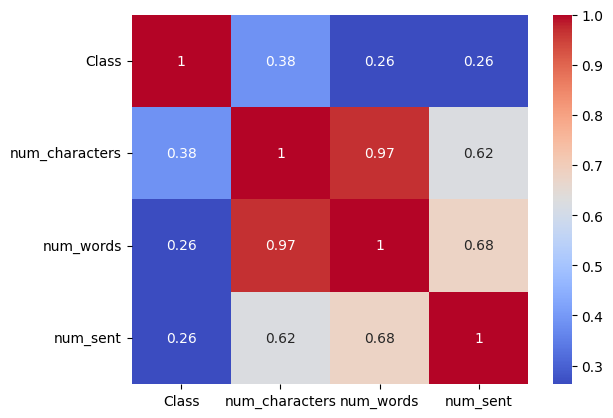

In [46]:
sns.heatmap(spam.corr(),annot=True,cmap="coolwarm")

In [47]:
from nltk.corpus import stopwords
nltk.download("stopwords")
# stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [48]:
import string
# string.punctuation

In [49]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
# ps.stem("Teaching")

In [50]:
def pre_proccessing(text):
  text=text.lower() ##convert into lower case
  text=nltk.word_tokenize(text) #break into words
  L=[]
  for i in text: ##removing special characters
    if i.isalnum():
      L.append(i)
    text=L[:]
    L.clear()
    for i in text:
      if i not in stopwords.words("english") and i not in string.punctuation: ##removing stop words and punctuations
        L.append(i)
    text=L[:]
    L.clear()
    for i in text: ##stemming of words
      L.append(ps.stem(i))
  return " ".join(L)

In [51]:
pre_proccessing("Did you like the Coffee I brewed for you after I wacthed the Dancing Competition ? ***")

'like coff brew wacth danc competit'

In [52]:
spam["transformed_text"]=spam.Text.apply(pre_proccessing)

In [53]:
spam.head()

,Class,Text,num_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [54]:
spam_list=[]
for msg in spam[spam.Class==1]["transformed_text"].tolist():
  for word in msg.split():
    spam_list.append(word)

In [55]:
len(spam_list)

9930

In [56]:
from collections import Counter
spam_top_30=pd.DataFrame(Counter(spam_list).most_common(30))
# spam_top_30

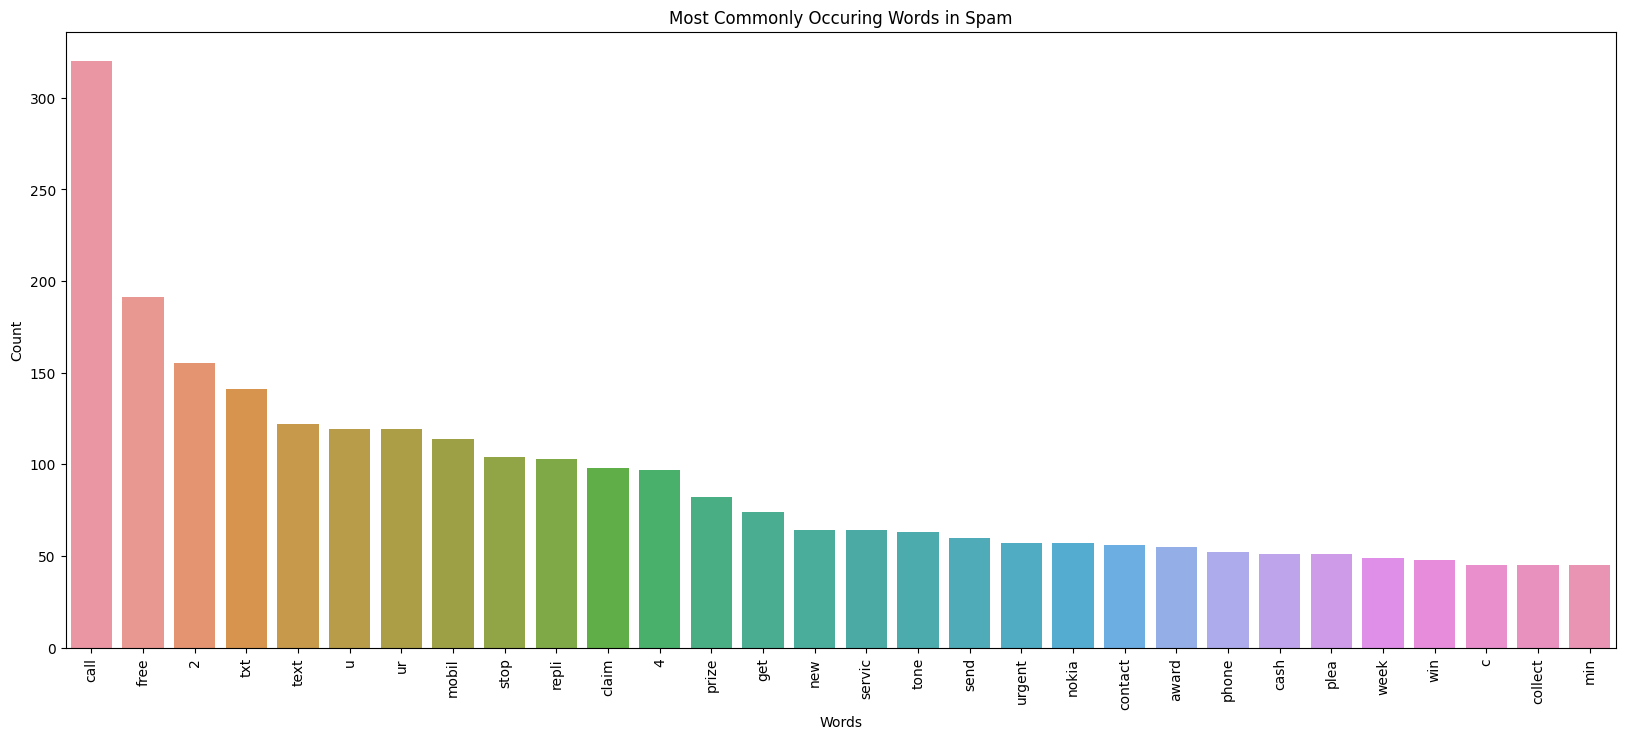

In [57]:
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=spam_top_30,x=spam_top_30[0],y=spam_top_30[1])
ax.set(xlabel="Words",ylabel="Count")
plt.xticks(rotation="vertical")
plt.title("Most Commonly Occuring Words in Spam")
plt.show()

In [58]:
ham_list=[]
for msg in spam[spam.Class==0]["transformed_text"].tolist():
  for word in msg.split():
    ham_list.append(word)

In [59]:
ham_top_30=pd.DataFrame(Counter(ham_list).most_common(30))
# ham_top_30

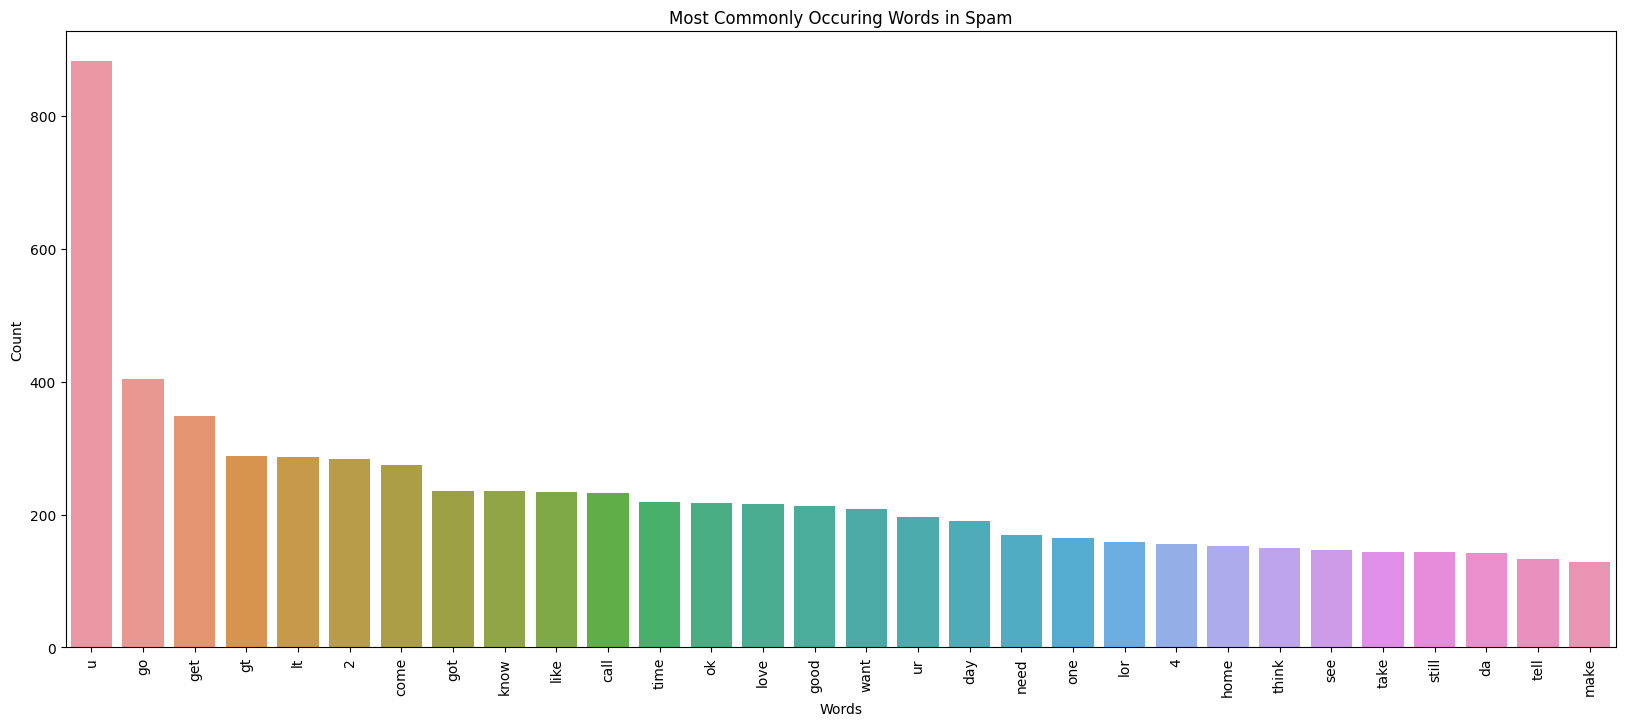

In [60]:
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=ham_top_30,x=ham_top_30[0],y=ham_top_30[1])
ax.set(xlabel="Words",ylabel="Count")
plt.xticks(rotation="vertical")
plt.title("Most Commonly Occuring Words in Spam")
plt.show()

Model Building

In [61]:
spam.sample(5)

,Class,Text,num_characters,num_words,num_sent,transformed_text
4948,0,I am in bus on the way to calicut,33,9,1,bu way calicut
2077,0,Hey hun-onbus goin 2 meet him. He wants 2go ou...,133,31,2,hey goin 2 meet want 2go 4a meal donyt feel li...
3084,0,In da car park,15,4,1,da car park
1393,0,Oh ok..,7,3,1,oh ok
3000,1,This message is free. Welcome to the new & imp...,134,28,4,messag free welcom new improv sex dog club uns...


In [62]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [63]:
X=cv.fit_transform(spam["transformed_text"]).toarray()
X.shape

(5169, 6672)

In [64]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [65]:
y=spam.Class.values
y.shape

(5169,)

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)

In [67]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [68]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [69]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [70]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.965183752417795
[[872  24]
 [ 12 126]]
0.84


In [71]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9709864603481625
[[893   3]
 [ 27 111]]
0.9736842105263158


In [72]:
spam.head()

,Class,Text,num_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(spam["transformed_text"]).toarray()
X.shape

(5169, 6672)

In [74]:
y=spam.Class.values

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [76]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [77]:
gnb.fit(X_train,y_train)
y_pred4=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [78]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [79]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9709864603481625
[[893   3]
 [ 27 111]]
0.9736842105263158


In [80]:
##tfidf ---mnb

In [81]:
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(spam["transformed_text"]).toarray()
X.shape

(5169, 6672)

In [82]:
y=spam.Class.values

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [84]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred2=lr.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9468085106382979
[[895   1]
 [ 54  84]]
0.9882352941176471


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [86]:
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [87]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [88]:
train_classifier(knc,X_train,y_train,X_test,y_test) ##kneighborclassifier

(0.9003868471953579, 1.0)

In [89]:
clfs = {
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
}

In [90]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For  LR
Accuracy -  0.9526112185686654
Precision -  0.9494949494949495
For  RF
Accuracy -  0.9700193423597679
Precision -  0.9908256880733946
